In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def numerizeClass(column):
    unq = df[column].dropna().unique()
    #Zmenil som 0 na 1
    cnt = 1
    for u in unq:
        # idx = df[df[column] == u].index.tolist()
        df[column].replace(u,cnt, inplace = True)
        # print(df[column])
        cnt +=1
    

# Data introduction

In [3]:
import pandas as pd
import re
import numpy as np
df = pd.read_csv('autos.csv',header=0,encoding='iso8859_2')

df['seller'].value_counts()
# mazu nepotrebne sloupce - nazev inzeratu, datum stazeni, pocet fotek = vzdy 0
# druheho typu je tak malo ze to nema smysl resit
df = df.drop(['name','dateCrawled','nrOfPictures','seller',"dateCreated","postalCode", "lastSeen"],axis=1)
df.head()


,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


## Categorical data handeling

In [4]:
nonnumericColumns = list(df.select_dtypes(include=['object']).columns)
dateColumns = [c for c in nonnumericColumns if re.match('date|month|lastSeen',c)]
groups = set(nonnumericColumns) -  set(dateColumns)
# print(groups)
# integer encoding
for g in list(groups):
    numerizeClass(g)

# 2016-03-24 11:52:17
for c in dateColumns:
    # df[c].str.replace("-","").astype(int)
    # df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y%m%d")
    df[c] = pd.to_datetime(df[c])
df.head()


,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,1,480,1,NaN,1993,1.0,0,1.0,150000,0,1.0,1,NaN
1,1,18300,1,1.0,2011,1.0,190,NaN,125000,5,2.0,2,1.0
2,1,9800,1,2.0,2004,2.0,163,2.0,125000,8,2.0,3,NaN
3,1,1500,1,3.0,2001,1.0,75,1.0,150000,6,1.0,1,2.0
4,1,3600,1,3.0,2008,1.0,69,3.0,90000,7,2.0,4,2.0


## Nan data removal

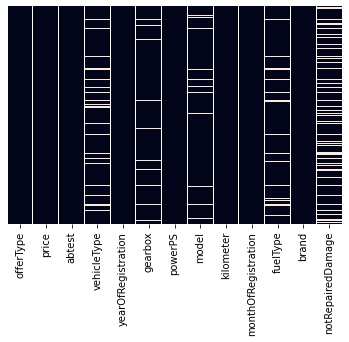

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False) 

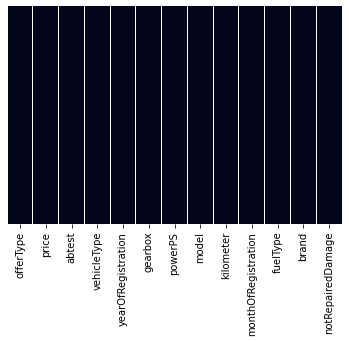

In [6]:
#mazu radky obsahujici nan
df.isnull().sum()
df.dropna(inplace=True)
# print(df.shape)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

## Skewed data
https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

In [7]:
# value should be less then 0.05
# print columns that are skewed
for column in df:
    try:
        print(f"Skew of {column}: is {df[column].skew()}")
    except Exception as err:
        print(err)

Skew of offerType: is 255.41485858991055
Skew of price: is 282.268049665252
Skew of abtest: is 0.07731254614647835
Skew of vehicleType: is 0.1219226713873071
Skew of yearOfRegistration: is -1.365406119721914
Skew of gearbox: is 1.260799889547236
Skew of powerPS: is 72.82563833607354
Skew of model: is 1.388092580155472
Skew of kilometer: is -1.3759768338655631
Skew of monthOfRegistration: is 0.07193676265504437
Skew of fuelType: is 2.0392571197830076
Skew of brand: is 1.3648796661420741
Skew of notRepairedDamage: is -2.537094060047216


#### Sqrt transformation

In [8]:
for column in df:
    try:
        df[column] = np.sqrt(df[column])
        print(f"Skew of {column}: is {np.sqrt(df[column]).skew()}")
    except Exception as err:
        print(err)

Skew of offerType: is 255.41485858991018
Skew of price: is 0.8800026070813768
Skew of abtest: is 0.07731254614647522
Skew of vehicleType: is -0.7065167468567224
Skew of yearOfRegistration: is -1.3906330344730589
Skew of gearbox: is 1.2607998895472339
Skew of powerPS: is -2.747476072976706
Skew of model: is 0.0004499817171153846
Skew of kilometer: is -2.2292203398116053
Skew of monthOfRegistration: is -2.1955353990805833
Skew of fuelType: is 0.9788514408703916
Skew of brand: is -0.035546415397668285
Skew of notRepairedDamage: is -2.5370940600472065


#### Box-con transformation

In [9]:
# # nefunguje... mozem pouzit rozne postupy na odstranenie nesumernosti dat??
# from scipy import stats

# for column in df:
#     try:
#         print(f"Skew of {column}: is {pd.Series(stats.boxcox(df[column])[0]).skew()}")
#     except Exception as err:
#         print(err)

## Counts of differente columns

In [10]:
df.columns

Index(['offerType', 'price', 'abtest', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

/home/peter/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


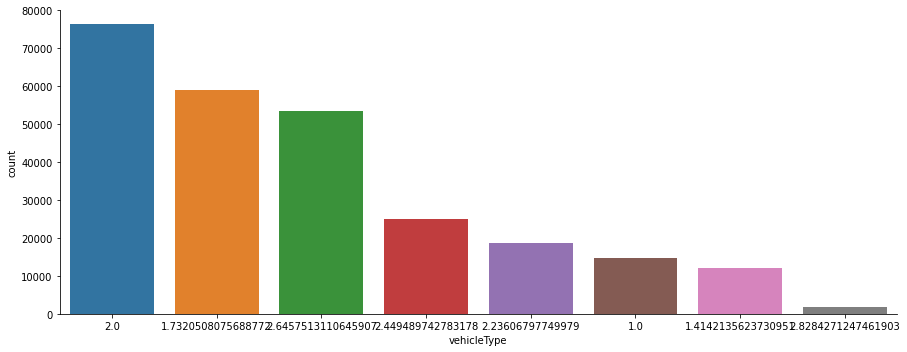

In [11]:
vegicleType = sns.factorplot(x='vehicleType', data=df , kind='count',aspect=2.5, order=pd.value_counts(df['vehicleType']).iloc[:40].index)
vegicleType.savefig('countVehiclesByCategory.png')

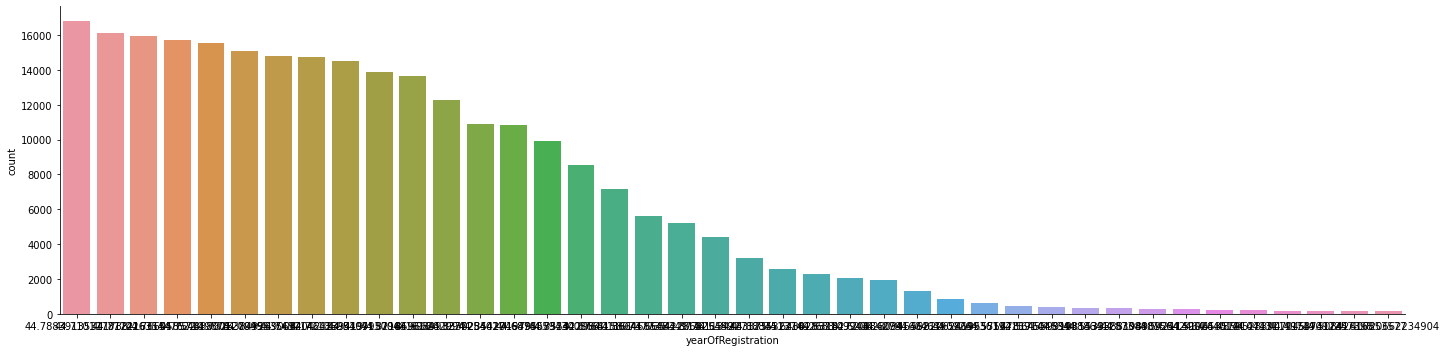

In [12]:
yearOfRegistration = sns.factorplot(x='yearOfRegistration', data=df , kind='count',aspect=4 ,order=pd.value_counts(df['yearOfRegistration']).iloc[:40].index)
yearOfRegistration.savefig('countYearOfRegistrationByYear.png')

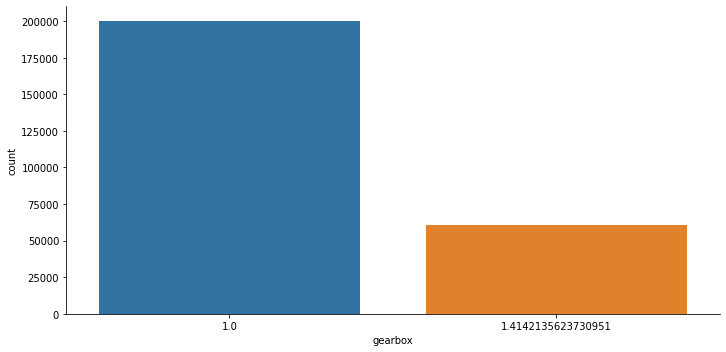

In [13]:
gearbox = sns.factorplot(x='gearbox', data=df , kind='count',aspect=2 ,order=pd.value_counts(df['gearbox']).iloc[:40].index)
gearbox.savefig('countGearbox.png')

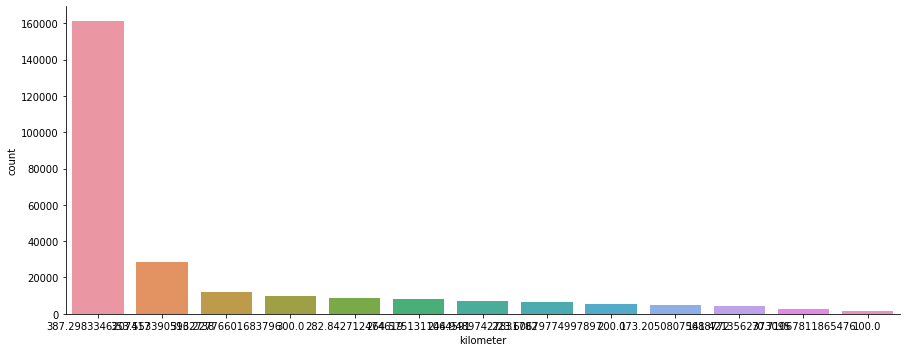

In [14]:
kilometer = sns.factorplot(x='kilometer', data=df , kind='count',aspect=2.5 ,order=pd.value_counts(df['kilometer']).iloc[:20].index)
kilometer.savefig('countKilometer.png')

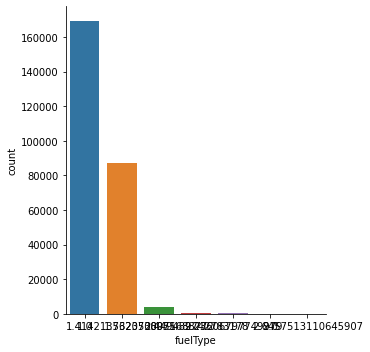

In [15]:
fuelType = sns.factorplot(x='fuelType', data=df , kind='count',aspect=1 ,order=pd.value_counts(df['fuelType']).iloc[:10].index)
fuelType.savefig('countFuelType.png')

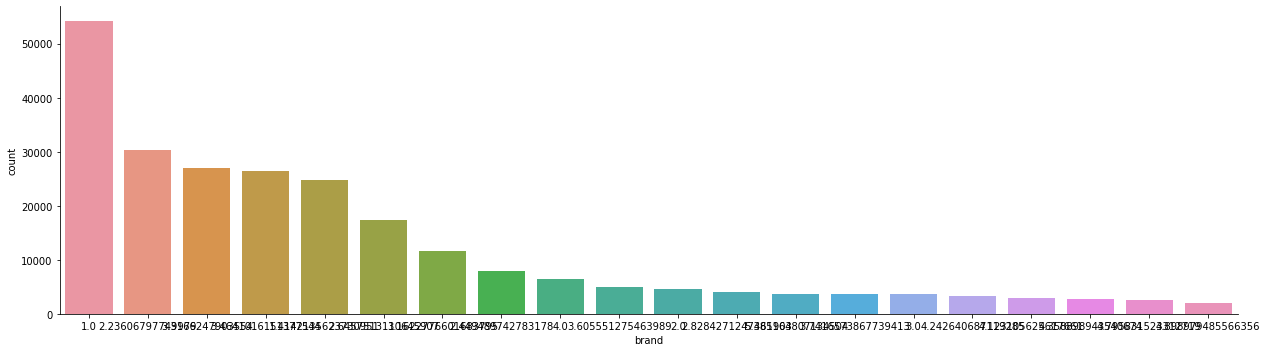

In [16]:
brand = sns.factorplot(x='brand', data=df , kind='count',aspect=3.5 ,order=pd.value_counts(df['brand']).iloc[:20].index)
brand.savefig('countBrand.png')

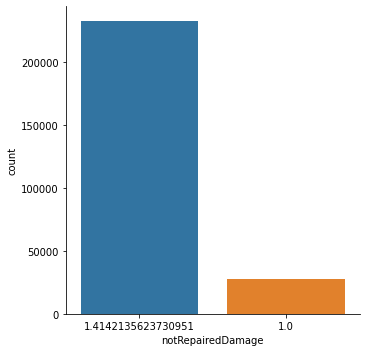

In [17]:
notRepairedDamage = sns.factorplot(x='notRepairedDamage', data=df , kind='count',aspect=1 ,order=pd.value_counts(df['notRepairedDamage']).iloc[:10].index)
notRepairedDamage.savefig('countNotRepairedDamage.png')

## Correlation heatmap, Pairplot, Histograms

#korelace mezi fetures - nevypada to dobre
plt.figure(figsize=(20,20))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)
plt.savefig('corelace_bez_Nan_hodnot.png')

smallerDF= df.loc[:100,:]
plt.figure(figsize=(20,20))
p=sns.pairplot(smallerDF)
plt.savefig('pairplot.png')

p = df.hist(figsize=(20,20),bins=150)
plt.savefig('histogram.png')

## Data Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled = pd.DataFrame(sc.fit_transform(df[['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration']]),
                      columns=['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration'],
                      index=df.index)
scaled.head()
clean_df = df.copy(deep=True)
clean_df[['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration']] = scaled[['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration']]
clean_df.head()
# co s monthOfRegistration dateCreated postalCode lastSeen ??


,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,1.0,38.729833,1.0,-0.721472,-0.353535,1.0,-0.585297,-1.392323,0.600989,2.449490,-0.702731,-1.293544,1.414214
4,1.0,60.000000,1.0,-0.721472,0.719853,1.0,-0.687225,-1.188236,-0.644546,2.645751,1.196025,-0.513876,1.414214
5,1.0,25.495098,1.0,-0.120446,-1.275077,1.0,-0.170460,-1.113535,0.600989,3.162278,-0.702731,-0.329821,1.000000
6,1.0,46.904158,1.0,0.409069,0.106718,1.0,-0.072230,-1.047722,0.600989,2.828427,-0.702731,-0.163423,1.414214
7,1.0,0.000000,1.0,-0.120446,-3.585013,1.0,-1.043351,-0.988222,-2.071302,2.645751,-0.702731,-1.293544,1.414214


### Data split

In [21]:
# Linear regression first shot
x_mean = clean_df.drop(["price"],axis=1)
y_mean = clean_df.price
x_minmax =  clean_df_minmax.drop(["price"],axis=1)
y_minmax = clean_df_minmax.price
x_robust = clean_df_robust.drop(["price"],axis=1)
y_robust = clean_df_robust.price

### Feature selection

In [106]:
l = list(range(0,len(clean_df.columns)))
clean_df.head()

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,1.0,38.729833,1.0,-0.721472,-0.353535,1.0,-0.585297,-1.392323,0.600989,2.449490,-0.702731,-1.293544,1.414214
4,1.0,60.000000,1.0,-0.721472,0.719853,1.0,-0.687225,-1.188236,-0.644546,2.645751,1.196025,-0.513876,1.414214
5,1.0,25.495098,1.0,-0.120446,-1.275077,1.0,-0.170460,-1.113535,0.600989,3.162278,-0.702731,-0.329821,1.000000
6,1.0,46.904158,1.0,0.409069,0.106718,1.0,-0.072230,-1.047722,0.600989,2.828427,-0.702731,-0.163423,1.414214
7,1.0,0.000000,1.0,-0.120446,-3.585013,1.0,-1.043351,-0.988222,-2.071302,2.645751,-0.702731,-1.293544,1.414214


In [ ]:
X = clean_df.drop("price",1) 
y = df["price"]  
X_1 = smf.add_constant(X)
regressor_ols = smf.OLS(y,X_1).fit()

In [ ]:
regressor_ols.summary(xname=list(clean_df.columns))

#### Backward Elimination

In [ ]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = smf.add_constant(X_1)
    model = smf.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
selected_features_BE

#### Recursive feature elimination

In [ ]:
#no of features
nof_list=np.arange(1,12)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = linear_model.LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
cols = list(X.columns)
model = linear_model.LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_robust, y_robust,random_state = 2,test_size=0.3)

### Linear Regression


In [150]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

train_sizes = [1, 100, 500, 2000, 5000, 7654]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = linear_model.LinearRegression(),
X = train_x,
y = train_y, 
train_sizes = train_sizes, 
cv = 5,
scoring = 'neg_mean_squared_error')

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1


adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))


accuracy: 44.10046560207076%
Mean absolute error: 17.866052435959716
Mean squared error: 1297.6797517359535
R Squared: 0.4410046560207076
Adjusted R Squared: 0.44092610030325274


In [127]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

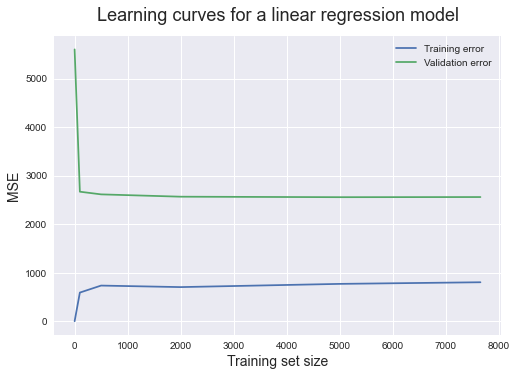

In [129]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()

Mean scalling
accuracy: 44.10046560207075%
Mean absolute error: 17.866052435959766
Mean squared error: 1297.679751735954
R Squared: 0.4410046560207075
Adjusted R Squared: 0.44092610030325263

Minmax scalling (to bude to stejny jako standar scalling)
accuracy: 44.100465602070784%
Mean absolute error: 17.866052435959723
Mean squared error: 1297.679751735953
R Squared: 0.4410046560207078
Adjusted R Squared: 0.44092610030325297

Robust scalling
accuracy: 44.10046560207075%
Mean absolute error: 17.866052435959624
Mean squared error: 1297.679751735954
R Squared: 0.4410046560207075
Adjusted R Squared: 0.44092610030325263



## Lasso regresion

In [156]:
las_reg = linear_model.Lasso(alpha=0.01)
las_reg.fit(train_x,train_y)
y_pred = las_reg.predict(test_x)
print("accuracy: "+ str(las_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 44.09729320091971%
Mean absolute error: 17.86366720005571
Mean squared error: 1297.753397443068
R Squared: 0.44097293200919707
Adjusted R Squared: 0.44089437183356117


In [155]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=las_reg, param_grid=param_grid, n_jobs=-1, return_train_score= True)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.43871430400234396
Best Params:  {'alpha': 0.001}


In [ ]:
param_range = np.logspace(-4,2,150)
train_scores, test_scores = validation_curve(
    linear_model.Lasso(), train_x, train_y, param_name="alpha", param_range=param_range,
    scoring=None, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Lasso")
plt.xlabel(r"$\alpha$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
# plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2,
#                  color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
# plt.fill_between(param_range, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2,
#                  color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


In [160]:
 np.logspace(-7,3,3)

array([1.e-07, 1.e-02, 1.e+03])

#### Exploring feature selection by Lasso

In [110]:
print("Best alpha using built-in LassoCV: %f" % las_reg.alpha)
print("Best score using built-in LassoCV: %f" %las_reg.score(X,y))
coef = pd.Series(las_reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.001000
Best score using built-in LassoCV: 0.266075


In [111]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 11 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

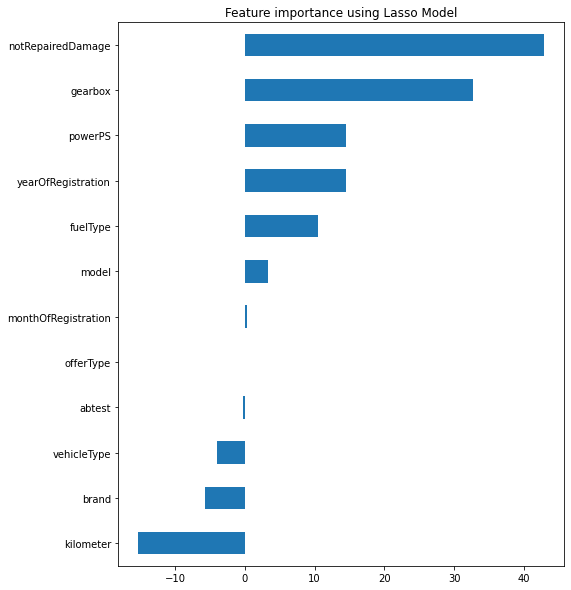

In [112]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Ridge regresion

In [101]:
rig_reg = linear_model.Ridge(alpha=0.1)
rig_reg.fit(train_x,train_y)
y_pred = rig_reg.predict(test_x)
print("accuracy: "+ str(rig_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 44.1004462434464%
Mean absolute error: 17.866031511434166
Mean squared error: 1297.6802011367422
R Squared: 0.441004462434464
Adjusted R Squared: 0.44092590668980447


In [96]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=rig_reg, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

In [98]:
print('Best Params: ', grid_result.best_params_)
print('Best Params: ', grid_result.best_score_)

Best Params:  {'alpha': 0.1}
Best Params:  0.43871749806406746
